# Classification of magnetic phases using a fully-connected neural network

### Machine learning phases of matter

Analysis based on a data set used in the paper *Machine learning phases of matter*, by Juan Carrasquilla & Roger G. Melko, published in *Nature Physics* in 2017: https://www.nature.com/articles/nphys4035

Nature Physics, **13**, 431–434 (2017)

### Data and task description

We consider a 2-dimensional square lattice of $n×n$ magnetic dipole moments (spins) that can be in one of two states (+1 or −1, Ising model). We assume that interactions between spins are of short ranged, i.e. each spin interacts only with its four neighbors. The probability to find a spin in one of the orientations is a function of temperature $T$ according to $ p∼ e^{−a/T} $, where $a=const$.

At very low temperatures $T→0$, neighboring spins have a very low probability of different orientations, so that a uniform overall state (ferromagnetic state) is adopted, characterized by +1 or −1. At very high temperatures $T \rightarrow \infty $, a paramagnetic phase with random spin alignment results, yielding 50% of +1 and 50% of −1 orientations. Below a critical temperature $0<T<T_c$, stable ferromagnetic domains emerge, with both orientations being equally probable in the absence of an external magnetic field. The spin-spin correlation functions diverge at $T_c$, whereas the correlation funcitons decay for $T>T_c$.

The data set for this task contains the $n×n$ dipole orientations on the lattice for different temperatures $T$. The task is to use a fully-connected neural network for classifying the two magnetic phases.

### Import data

In [23]:
from tensorflow import keras
import numpy as np
callbacks = keras.callbacks
layers = keras.layers

print("keras", keras.__version__)

keras 2.4.0


In [24]:
path = r"C:\Users\Kepesidis\Desktop\Deep Learning for Physicists\tutorials\Tutorial 4\ising_data.npz"
f = np.load(path, allow_pickle=True)
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:]
T_train, T_test = f["T"][:n_train], f["T"][n_train:]

In [25]:
k=1

f["T"][k], f["C"][k]

(1.8000000000000007,
 array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1., -1., -1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]]))

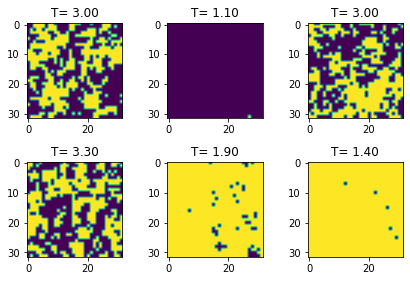

In [27]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T= %.2f" % T_train[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'frequency')

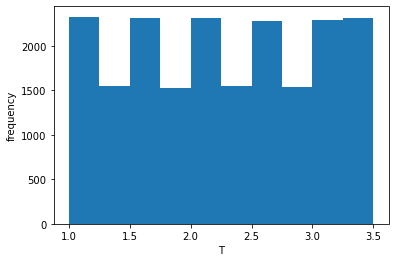

In [28]:
plt.hist(T_train)
plt.xlabel("T")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

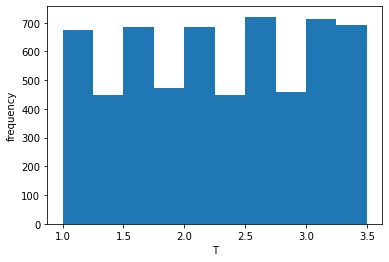

In [29]:
plt.hist(T_test)
plt.xlabel("T")
plt.ylabel("frequency")

#### Definition of magnetic phases in the training set

In [31]:
Tc = 2.27
y_train, y_test = T_train > Tc, T_test > Tc

In [32]:
y_train

array([ True, False, False, ..., False,  True,  True])

### Tasks

- Construct and train a fully-connected neural network (using Keras) for the classification of magnetic phases
- Evaluate the network's performance on the test set
- Plot the test accuracy as function of the temperature. What do you observe?

### 1. Design the network

In [33]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 1)))

model.add(layers.Reshape((1024,)))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                32800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 33,889
Trainable params: 33,889
Non-trainable params: 0
__________________________________________________

### 2. Compile the network

In [34]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

### 3. Train the network

In [35]:
results = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[
                        callbacks.EarlyStopping(patience=5, verbose=1),
                        callbacks.ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)]
                    )

Epoch 1/50
282/282 - 0s - loss: 0.2552 - accuracy: 0.9019 - val_loss: 0.0850 - val_accuracy: 0.9720
Epoch 2/50
282/282 - 0s - loss: 0.1459 - accuracy: 0.9520 - val_loss: 0.0822 - val_accuracy: 0.9730
Epoch 3/50
282/282 - 0s - loss: 0.1171 - accuracy: 0.9638 - val_loss: 0.0934 - val_accuracy: 0.9745
Epoch 4/50
282/282 - 0s - loss: 0.0998 - accuracy: 0.9677 - val_loss: 0.0685 - val_accuracy: 0.9765
Epoch 5/50
282/282 - 0s - loss: 0.0882 - accuracy: 0.9717 - val_loss: 0.0677 - val_accuracy: 0.9765
Epoch 6/50
282/282 - 0s - loss: 0.0770 - accuracy: 0.9750 - val_loss: 0.0760 - val_accuracy: 0.9725
Epoch 7/50

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0006700000318232924.
282/282 - 0s - loss: 0.0679 - accuracy: 0.9777 - val_loss: 0.0754 - val_accuracy: 0.9730
Epoch 8/50
282/282 - 0s - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0708 - val_accuracy: 0.9735
Epoch 9/50

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004489000252215192.
282/282 - 0s - loss: 0.0535

### 4. Monitor performance

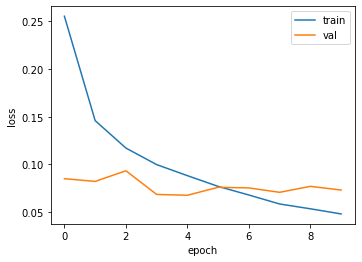

In [36]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

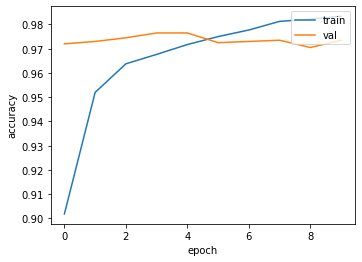

In [37]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

### 5. Model evaluation on the test set

In [38]:
a = model.evaluate(x_test, y_test, verbose=0)

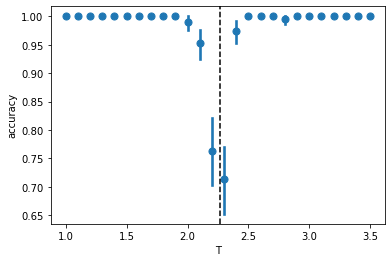

In [39]:
import seaborn as sns

preds = model.predict(x_test).round().squeeze()
acc = (preds == y_test).astype(float)

ax = sns.regplot(x=T_test, y=acc, x_estimator= np.mean, fit_reg=False)
ax.set_ylabel("accuracy")
ax.set_xlabel("T")
plt.axvline(x=Tc, color='k', linestyle='--', label='Tc')